<a href="https://colab.research.google.com/github/rezwanh001/Kaggle-Competition-LANL-Earthquake-Prediction/blob/master/LANL_Earthquake_Prediction_Version_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))


In [1]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

TPU address is grpc://10.30.248.250:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, 18120376669992831471),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 2100092088614394773),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 17294893996156168824),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 13252845934090219666),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 10042328904974524515),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 14789724699527938432),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 7294893163697355757),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, 11675804793037346423),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:6, TPU, 17179869184, 148406037

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# to access kaggle datasets
!pip install kaggle

# Math operations
!pip install numpy==1.15.0

# Machine learning
!pip install catboost

    100% |████████████████████████████████| 13.9MB 2.3MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
pymc3 3.6 has requirement joblib<0.13.0, but you'll have joblib 0.13.2 which is incompatible.
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


    100% |████████████████████████████████| 55.5MB 631kB/s 


In [4]:
# Colab's file access feature
from google.colab import files

# retrieve upload file
uploaded = files.upload()

#print results
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

# Then move kaggle.jason into the folder where the API expects to to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/kaggle/kaggle.json 

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
chmod: cannot access '/root/kaggle/kaggle.json': No such file or directory


In [8]:
# list competitions
!kaggle competitions list

#download earthquake data
!kaggle competitions download -c LANL-Earthquake-Prediction

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2517           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge       9879            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       4061           False  
imagenet-object-localization-challenge         2029-12-31 07:00:00  Research         Knowledge         35           False  
competitive-data-science-predict-future-sales  2019-12-31 23:59:00  Playground           Kudos       2382           False  
two-sigma-financial-news                       2019-07-15 23:59:00  Featured          $100,000       2927           False  
LANL-Ear

In [9]:
!ls

drive  sample_data  sample_submission.csv  test.zip  train.csv.zip


In [0]:
#unzip training data for usage
!unzip train.csv.zip
!ls

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
##======================= Import Libraries =====================================#############
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
import time
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb
from scipy import stats
from scipy.signal import hann
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from scipy.signal import convolve
from sklearn.svm import NuSVR, SVR
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold,StratifiedKFold, RepeatedKFold
warnings.filterwarnings("ignore")



In [0]:
##=========================Load The Data ==============================                  
train_df=pd.read_csv('train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
print("Train: rows:{} cols:{}".format(train_df.shape[0], train_df.shape[1]))

pd.options.display.precision = 15
train_df.head(10)


Train: rows:629145480 cols:2


,acoustic_data,time_to_failure
0,12,1.469099998474121
1,6,1.469099998474121
2,8,1.469099998474121
3,5,1.469099998474121
4,8,1.469099998474121
5,8,1.469099998474121
6,9,1.469099998474121
7,7,1.469099998474121
8,-5,1.469099998474121
9,3,1.469099998474121


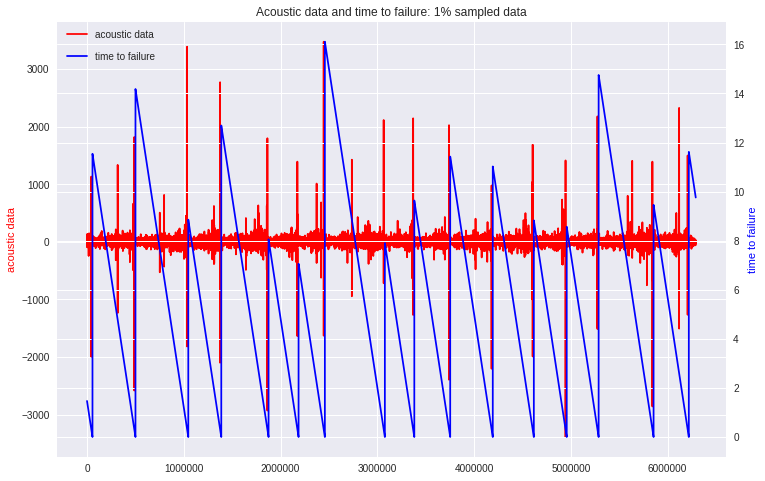

In [0]:
#######===================Data Exploration ===================================+++#############
train_ad_sample_df = train_df['acoustic_data'].values[::100]
train_ttf_sample_df = train_df['time_to_failure'].values[::100]

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 1% sampled data"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)
del train_ad_sample_df
del train_ttf_sample_df


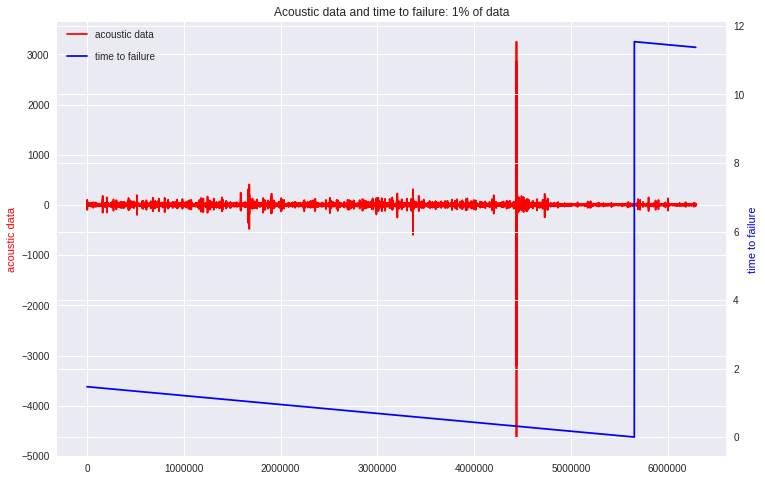

In [0]:
train_ad_sample_df = train_df['acoustic_data'].values[:6291455]
train_ttf_sample_df = train_df['time_to_failure'].values[:6291455]
plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure: 1% of data")
del train_ad_sample_df
del train_ttf_sample_df

In [0]:

###================ Features Engineering ======================##########
rows = 150000
segments = int(np.floor(train_df.shape[0] / rows))
print("Number of segments: ", segments)

def add_trend_feature(arr, abs_values=False):
    idx = np.array(range(len(arr)))
    if abs_values:
        arr = np.abs(arr)
    lr = LinearRegression()
    lr.fit(idx.reshape(-1, 1), arr)
    return lr.coef_[0]

def classic_sta_lta(x, length_sta, length_lta):
    sta = np.cumsum(x ** 2)
    # Convert to float
    sta = np.require(sta, dtype=np.float)
    # Copy for LTA
    lta = sta.copy()
    # Compute the STA and the LTA
    sta[length_sta:] = sta[length_sta:] - sta[:-length_sta]
    sta /= length_sta
    lta[length_lta:] = lta[length_lta:] - lta[:-length_lta]
    lta /= length_lta
    # Pad zeros
    sta[:length_lta - 1] = 0
    # Avoid division by zero by setting zero values to tiny float
    dtiny = np.finfo(0.0).tiny
    idx = lta < dtiny
    lta[idx] = dtiny
    return sta / lta

Number of segments:  4194


In [0]:

### =============== Process The train file ==================== ##########
train_X = pd.DataFrame(index=range(segments), dtype=np.float64)
train_y = pd.DataFrame(index=range(segments), dtype=np.float64, columns=['time_to_failure'])
total_mean = train_df['acoustic_data'].mean()
total_std = train_df['acoustic_data'].std()
total_max = train_df['acoustic_data'].max()
total_min = train_df['acoustic_data'].min()
total_sum = train_df['acoustic_data'].sum()
total_abs_sum = np.abs(train_df['acoustic_data']).sum()

def create_features(seg_id, seg, X):
    xc = pd.Series(seg['acoustic_data'].values)
    zc = np.fft.fft(xc)
    
    X.loc[seg_id, 'mean'] = xc.mean()
    X.loc[seg_id, 'std'] = xc.std()
    X.loc[seg_id, 'max'] = xc.max()
    X.loc[seg_id, 'min'] = xc.min()
    
    #FFT transform values
    realFFT = np.real(zc)
    imagFFT = np.imag(zc)
    X.loc[seg_id, 'Rmean'] = realFFT.mean()
    X.loc[seg_id, 'Rstd'] = realFFT.std()
    X.loc[seg_id, 'Rmax'] = realFFT.max()
    X.loc[seg_id, 'Rmin'] = realFFT.min()
    X.loc[seg_id, 'Imean'] = imagFFT.mean()
    X.loc[seg_id, 'Istd'] = imagFFT.std()
    X.loc[seg_id, 'Imax'] = imagFFT.max()
    X.loc[seg_id, 'Imin'] = imagFFT.min()
    X.loc[seg_id, 'Rmean_last_5000'] = realFFT[-5000:].mean()
    X.loc[seg_id, 'Rstd__last_5000'] = realFFT[-5000:].std()
    X.loc[seg_id, 'Rmax_last_5000'] = realFFT[-5000:].max()
    X.loc[seg_id, 'Rmin_last_5000'] = realFFT[-5000:].min()
    X.loc[seg_id, 'Rmean_last_15000'] = realFFT[-15000:].mean()
    X.loc[seg_id, 'Rstd_last_15000'] = realFFT[-15000:].std()
    X.loc[seg_id, 'Rmax_last_15000'] = realFFT[-15000:].max()
    X.loc[seg_id, 'Rmin_last_15000'] = realFFT[-15000:].min()
    
    X.loc[seg_id, 'mean_change_abs'] = np.mean(np.diff(xc))
    X.loc[seg_id, 'mean_change_rate'] = np.mean(np.nonzero((np.diff(xc) / xc[:-1]))[0])
    X.loc[seg_id, 'abs_max'] = np.abs(xc).max()
    X.loc[seg_id, 'abs_min'] = np.abs(xc).min()
    
    X.loc[seg_id, 'std_first_50000'] = xc[:50000].std()
    X.loc[seg_id, 'std_last_50000'] = xc[-50000:].std()
    X.loc[seg_id, 'std_first_10000'] = xc[:10000].std()
    X.loc[seg_id, 'std_last_10000'] = xc[-10000:].std()
    
    X.loc[seg_id, 'avg_first_50000'] = xc[:50000].mean()
    X.loc[seg_id, 'avg_last_50000'] = xc[-50000:].mean()
    X.loc[seg_id, 'avg_first_10000'] = xc[:10000].mean()
    X.loc[seg_id, 'avg_last_10000'] = xc[-10000:].mean()
    
    X.loc[seg_id, 'min_first_50000'] = xc[:50000].min()
    X.loc[seg_id, 'min_last_50000'] = xc[-50000:].min()
    X.loc[seg_id, 'min_first_10000'] = xc[:10000].min()
    X.loc[seg_id, 'min_last_10000'] = xc[-10000:].min()
    
    X.loc[seg_id, 'max_first_50000'] = xc[:50000].max()
    X.loc[seg_id, 'max_last_50000'] = xc[-50000:].max()
    X.loc[seg_id, 'max_first_10000'] = xc[:10000].max()
    X.loc[seg_id, 'max_last_10000'] = xc[-10000:].max()
    
    X.loc[seg_id, 'max_to_min'] = xc.max() / np.abs(xc.min())
    X.loc[seg_id, 'max_to_min_diff'] = xc.max() - np.abs(xc.min())
    X.loc[seg_id, 'count_big'] = len(xc[np.abs(xc) > 500])
    X.loc[seg_id, 'sum'] = xc.sum()
    
    X.loc[seg_id, 'mean_change_rate_first_50000'] = np.mean(np.nonzero((np.diff(xc[:50000]) / xc[:50000][:-1]))[0])
    X.loc[seg_id, 'mean_change_rate_last_50000'] = np.mean(np.nonzero((np.diff(xc[-50000:]) / xc[-50000:][:-1]))[0])
    X.loc[seg_id, 'mean_change_rate_first_10000'] = np.mean(np.nonzero((np.diff(xc[:10000]) / xc[:10000][:-1]))[0])
    X.loc[seg_id, 'mean_change_rate_last_10000'] = np.mean(np.nonzero((np.diff(xc[-10000:]) / xc[-10000:][:-1]))[0])
    
    X.loc[seg_id, 'q95'] = np.quantile(xc, 0.95)
    X.loc[seg_id, 'q99'] = np.quantile(xc, 0.99)
    X.loc[seg_id, 'q05'] = np.quantile(xc, 0.05)
    X.loc[seg_id, 'q01'] = np.quantile(xc, 0.01)
    
    X.loc[seg_id, 'abs_q95'] = np.quantile(np.abs(xc), 0.95)
    X.loc[seg_id, 'abs_q99'] = np.quantile(np.abs(xc), 0.99)
    X.loc[seg_id, 'abs_q05'] = np.quantile(np.abs(xc), 0.05)
    X.loc[seg_id, 'abs_q01'] = np.quantile(np.abs(xc), 0.01)
    
    X.loc[seg_id, 'trend'] = add_trend_feature(xc)
    X.loc[seg_id, 'abs_trend'] = add_trend_feature(xc, abs_values=True)
    X.loc[seg_id, 'abs_mean'] = np.abs(xc).mean()
    X.loc[seg_id, 'abs_std'] = np.abs(xc).std()
    
    X.loc[seg_id, 'mad'] = xc.mad()
    X.loc[seg_id, 'kurt'] = xc.kurtosis()
    X.loc[seg_id, 'skew'] = xc.skew()
    X.loc[seg_id, 'med'] = xc.median()
    
    X.loc[seg_id, 'Hilbert_mean'] = np.abs(hilbert(xc)).mean()
    X.loc[seg_id, 'Hann_window_mean'] = (convolve(xc, hann(150), mode='same') / sum(hann(150))).mean()
    X.loc[seg_id, 'classic_sta_lta1_mean'] = classic_sta_lta(xc, 500, 10000).mean()
    X.loc[seg_id, 'classic_sta_lta2_mean'] = classic_sta_lta(xc, 5000, 100000).mean()
    X.loc[seg_id, 'classic_sta_lta3_mean'] = classic_sta_lta(xc, 3333, 6666).mean()
    X.loc[seg_id, 'classic_sta_lta4_mean'] = classic_sta_lta(xc, 10000, 25000).mean()
    X.loc[seg_id, 'Moving_average_700_mean'] = xc.rolling(window=700).mean().mean(skipna=True)
    X.loc[seg_id, 'Moving_average_1500_mean'] = xc.rolling(window=1500).mean().mean(skipna=True)
    X.loc[seg_id, 'Moving_average_3000_mean'] = xc.rolling(window=3000).mean().mean(skipna=True)
    X.loc[seg_id, 'Moving_average_6000_mean'] = xc.rolling(window=6000).mean().mean(skipna=True)
    ewma = pd.Series.ewm
    X.loc[seg_id, 'exp_Moving_average_300_mean'] = (ewma(xc, span=300).mean()).mean(skipna=True)
    X.loc[seg_id, 'exp_Moving_average_3000_mean'] = ewma(xc, span=3000).mean().mean(skipna=True)
    X.loc[seg_id, 'exp_Moving_average_30000_mean'] = ewma(xc, span=6000).mean().mean(skipna=True)
    no_of_std = 2
    X.loc[seg_id, 'MA_700MA_std_mean'] = xc.rolling(window=700).std().mean()
    X.loc[seg_id,'MA_700MA_BB_high_mean'] = (X.loc[seg_id, 'Moving_average_700_mean'] + no_of_std * X.loc[seg_id, 'MA_700MA_std_mean']).mean()
    X.loc[seg_id,'MA_700MA_BB_low_mean'] = (X.loc[seg_id, 'Moving_average_700_mean'] - no_of_std * X.loc[seg_id, 'MA_700MA_std_mean']).mean()
    X.loc[seg_id, 'MA_400MA_std_mean'] = xc.rolling(window=400).std().mean()
    X.loc[seg_id,'MA_400MA_BB_high_mean'] = (X.loc[seg_id, 'Moving_average_700_mean'] + no_of_std * X.loc[seg_id, 'MA_400MA_std_mean']).mean()
    X.loc[seg_id,'MA_400MA_BB_low_mean'] = (X.loc[seg_id, 'Moving_average_700_mean'] - no_of_std * X.loc[seg_id, 'MA_400MA_std_mean']).mean()
    X.loc[seg_id, 'MA_1000MA_std_mean'] = xc.rolling(window=1000).std().mean()
    
    X.loc[seg_id, 'iqr'] = np.subtract(*np.percentile(xc, [75, 25]))
    X.loc[seg_id, 'q999'] = np.quantile(xc,0.999)
    X.loc[seg_id, 'q001'] = np.quantile(xc,0.001)
    X.loc[seg_id, 'ave10'] = stats.trim_mean(xc, 0.1)
    
    for windows in [10, 100, 1000]:
        x_roll_std = xc.rolling(windows).std().dropna().values
        x_roll_mean = xc.rolling(windows).mean().dropna().values
        
        X.loc[seg_id, 'ave_roll_std_' + str(windows)] = x_roll_std.mean()
        X.loc[seg_id, 'std_roll_std_' + str(windows)] = x_roll_std.std()
        X.loc[seg_id, 'max_roll_std_' + str(windows)] = x_roll_std.max()
        X.loc[seg_id, 'min_roll_std_' + str(windows)] = x_roll_std.min()
        X.loc[seg_id, 'q01_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.01)
        X.loc[seg_id, 'q05_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.05)
        X.loc[seg_id, 'q95_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.95)
        X.loc[seg_id, 'q99_roll_std_' + str(windows)] = np.quantile(x_roll_std, 0.99)
        X.loc[seg_id, 'av_change_abs_roll_std_' + str(windows)] = np.mean(np.diff(x_roll_std))
        X.loc[seg_id, 'av_change_rate_roll_std_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_std) / x_roll_std[:-1]))[0])
        X.loc[seg_id, 'abs_max_roll_std_' + str(windows)] = np.abs(x_roll_std).max()
        
        X.loc[seg_id, 'ave_roll_mean_' + str(windows)] = x_roll_mean.mean()
        X.loc[seg_id, 'std_roll_mean_' + str(windows)] = x_roll_mean.std()
        X.loc[seg_id, 'max_roll_mean_' + str(windows)] = x_roll_mean.max()
        X.loc[seg_id, 'min_roll_mean_' + str(windows)] = x_roll_mean.min()
        X.loc[seg_id, 'q01_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.01)
        X.loc[seg_id, 'q05_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.05)
        X.loc[seg_id, 'q95_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.95)
        X.loc[seg_id, 'q99_roll_mean_' + str(windows)] = np.quantile(x_roll_mean, 0.99)
        X.loc[seg_id, 'av_change_abs_roll_mean_' + str(windows)] = np.mean(np.diff(x_roll_mean))
        X.loc[seg_id, 'av_change_rate_roll_mean_' + str(windows)] = np.mean(np.nonzero((np.diff(x_roll_mean) / x_roll_mean[:-1]))[0])
        X.loc[seg_id, 'abs_max_roll_mean_' + str(windows)] = np.abs(x_roll_mean).max()


In [0]:
# iterate over all segments
for seg_id in tqdm_notebook(range(segments)):
    seg = train_df.iloc[seg_id*rows:seg_id*rows+rows]
    create_features(seg_id, seg, train_X)
    train_y.loc[seg_id, 'time_to_failure'] = seg['time_to_failure'].values[-1]
print(train_X.shape)
print(train_X.head(10))



(4194, 154)
                mean                std    max    min               Rmean  \
0  4.884113333333334  5.101106130606765  104.0  -98.0  12.000000000000004   
1  4.725766666666667  6.588823781946801  181.0 -154.0   4.999999999999998   
2  4.906393333333333  6.967397033524431  140.0 -106.0   5.000000000000000   
3  4.902240000000000  6.922305187180113  197.0 -199.0   5.000000000000003   
4  4.908720000000000  7.301110189758817  145.0 -126.0  12.000000000000004   
5  4.913513333333333  5.434111112860393  142.0 -144.0  14.000000000000000   
6  4.855660000000000  5.687823395051908  120.0  -78.0  -0.000000000000002   
7  4.505426666666667  5.854511569720713  139.0 -134.0   3.000000000000004   
8  4.717833333333333  7.789643113079984  168.0 -156.0   1.000000000000002   
9  4.730960000000000  6.890459152667711  152.0 -126.0   5.000000000000003   

                   Rstd      Rmax                   Rmin  \
0  2349.811481800189085  732617.0 -20121.154171234855312   
1  2566.03224843336

In [0]:
## Scale 
scaler = StandardScaler()
scaler.fit(train_X)
scaled_train_X = pd.DataFrame(scaler.transform(train_X), columns=train_X.columns)
print(scaled_train_X.head(10))


                mean                std                max                min  \
0  1.424140499795022 -0.170213582943171 -0.218193508692627  0.193218185209325   
1  0.805716032556442  0.004734017014316  0.063936007992510 -0.018037271219829   
2  1.511155259373638  0.049252196732055 -0.086288799593083  0.163038834290874   
3  1.494934375107487  0.043949637951170  0.122560323147863 -0.187796120136112   
4  1.520242078970568  0.088495070341074 -0.067968701107035  0.087590456994748   
5  1.538962489544185 -0.131053986788160 -0.078960760198664  0.019686917428235   
6  1.313015726042317 -0.101218785996422 -0.159569193537274  0.268666562505451   
7 -0.054824008985421 -0.081617152532347 -0.089952819290292  0.057411106076298   
8  0.774732321036825  0.145943916470089  0.016303751928785 -0.025582108949441   
9  0.825998647072221  0.040204715451199 -0.042320563226568  0.087590456994748   

               Rmean               Rstd               Rmax               Rmin  \
0  1.199316205489370 -0.105

In [0]:
#unzip test data for usage
!unzip test.zip
!ls

In [0]:
######======================= Process the test data ======================###########
submission = pd.read_csv('sample_submission.csv', index_col='seg_id')
test_X = pd.DataFrame(columns=train_X.columns, dtype=np.float64, index=submission.index)
print(submission.shape, test_X.shape)

for seg_id in tqdm_notebook(test_X.index):
    seg = pd.read_csv(seg_id + '.csv')
    create_features(seg_id, seg, test_X)

scaled_test_X = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)
print(scaled_test_X.shape)
print(scaled_test_X.tail(10))


(2624, 1) (2624, 154)



(2624, 154)
                   mean                std                max  \
2614 -1.081634623438432 -0.268601942297170 -0.350098217792172   
2615 -0.734695164615844 -0.320940103313106 -0.390402434461477   
2616 -2.073321685925087  0.185999424044793  0.045615909506462   
2617 -0.427930383839279 -0.291596382505905 -0.196209390509370   
2618 -3.374741716678421 -0.152003490043613 -0.298801942031238   
2619 -1.654729139621841 -0.172408272635866 -0.339106158700543   
2620 -1.487885758598570 -0.060792925011133  0.001647673139947   
2621 -3.010670087956753  0.343254632011415  0.536594548932544   
2622 -0.694312192710866  0.782096807867229  0.727123573187442   
2623 -1.248764408517769 -0.349888468230792 -0.331778119306124   

                    min              Rmean               Rstd  \
2614  0.329025264342352 -0.081175674433600 -0.256057804503499   
2615  0.400701222773672  0.559070265527884 -0.271490841421192   
2616  0.027231755157847  0.238947295547142  0.058192651768876   
2617  0.310

In [20]:
!ls '/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction'

'LANL Earthquake Prediction.ipynb'		 scaled_test_X.pckl
'LANL Earthquake Prediction: Version-01.ipynb'	 scaled_train_X.pckl
 lgbm_importances.png				 submission_1.csv
 sample_submission.pckl				 train_y.pckl


In [0]:
### ================ Store "scaled_train_X", "scaled_test_X"  ============
import pickle

f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/scaled_train_X.pckl', 'wb')
pickle.dump(scaled_train_X, f)
f.close()

###============================

f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/scaled_test_X.pckl', 'wb')
pickle.dump(scaled_test_X, f)
f.close()

###=================================
f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/train_y.pckl', 'wb')
pickle.dump(train_y, f)
f.close()



In [0]:
#### ============== Load "scaled_train_X", "scaled_test_X"  ============
import pickle
f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/scaled_train_X.pckl', 'rb')
scaled_train_X = pickle.load(f)
f.close()

f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/scaled_test_X.pckl', 'rb')
scaled_test_X = pickle.load(f)
f.close()


f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/train_y.pckl', 'rb')
train_y = pickle.load(f)
f.close()


In [22]:

###============================ Run Model with 10 folds CV ==================================+##########
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
train_columns = scaled_train_X.columns.values

# define model parameter
params = {'num_leaves': 51,
         'min_data_in_leaf': 10, 
         'objective':'regression',
         'max_depth': -1,
         'learning_rate': 0.001,
         "boosting": "gbdt",
         "feature_fraction": 0.91,
         "bagging_freq": 1,
         "bagging_fraction": 0.91,
         "bagging_seed": 42,
         "metric": 'mae',
         "lambda_l1": 0.1,
         "verbosity": -1,
         "nthread": -1,
         "random_state": 42}



oof = np.zeros(len(scaled_train_X))
predictions = np.zeros(len(scaled_test_X))
feature_importance_df = pd.DataFrame()
#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(scaled_train_X,train_y.values)):
    strLog = "fold {}".format(fold_)
    print(strLog)
    
    X_tr, X_val = scaled_train_X.iloc[trn_idx], scaled_train_X.iloc[val_idx]
    y_tr, y_val = train_y.iloc[trn_idx], train_y.iloc[val_idx]
    
    # define model:LGBMRegressor  
    model = lgb.LGBMRegressor(**params, n_estimators = 20000, n_jobs = -1)
    model.fit(X_tr, y_tr, 
                    eval_set=[(X_tr, y_tr), (X_val, y_val)], eval_metric='mae',
                    verbose=1000, early_stopping_rounds=200)
    oof[val_idx] = model.predict(X_val, num_iteration=model.best_iteration_)
    #feature importance
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = train_columns
    fold_importance_df["importance"] = model.feature_importances_[:len(train_columns)]
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    #predictions
    predictions += model.predict(scaled_test_X, num_iteration=model.best_iteration_) / folds.n_splits


fold 0
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 1.97555	valid_1's l1: 2.29544
[2000]	training's l1: 1.60615	valid_1's l1: 2.14118
[3000]	training's l1: 1.39238	valid_1's l1: 2.10758
[4000]	training's l1: 1.22667	valid_1's l1: 2.10213
Early stopping, best iteration is:
[3825]	training's l1: 1.25336	valid_1's l1: 2.10158
fold 1
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 1.98805	valid_1's l1: 2.21085
[2000]	training's l1: 1.61651	valid_1's l1: 2.09094
[3000]	training's l1: 1.39733	valid_1's l1: 2.06806
[4000]	training's l1: 1.22994	valid_1's l1: 2.06515
Early stopping, best iteration is:
[3906]	training's l1: 1.24416	valid_1's l1: 2.0649
fold 2
Training until validation scores don't improve for 200 rounds.
[1000]	training's l1: 1.98284	valid_1's l1: 2.22314
[2000]	training's l1: 1.6089	valid_1's l1: 2.13062
[3000]	training's l1: 1.39194	valid_1's l1: 2.11455
[4000]	training's l1: 1.22465	valid_1's l1: 2.

In [37]:

###============================ Run Model- 2, with 10 folds CV ==================================+##########
n_fold = 10
folds = KFold(n_splits=n_fold, shuffle=True, random_state=42)
train_columns = scaled_train_X.columns.values


oof = np.zeros(len(scaled_train_X))
predictions_2 = np.zeros(len(scaled_test_X))
feature_importance_df = pd.DataFrame()
#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(scaled_train_X,train_y.values)):
    strLog = "fold {}".format(fold_)
    print(strLog)
    
    X_tr, X_val = scaled_train_X.iloc[trn_idx], scaled_train_X.iloc[val_idx]
    y_tr, y_val = train_y.iloc[trn_idx], train_y.iloc[val_idx]
    
    # define model:NuSVR  
    model = NuSVR(gamma='scale', nu=0.9, C=10.0, tol=0.01)
    model.fit(X_tr, y_tr)
    oof[val_idx] = model.predict(X_val)
    
    #predictions
    predictions_2 += model.predict(scaled_test_X) / folds.n_splits


fold 0
fold 1
fold 2
fold 3
fold 4
fold 5
fold 6
fold 7
fold 8
fold 9


In [0]:
pred = (predictions+predictions_2)/2.0

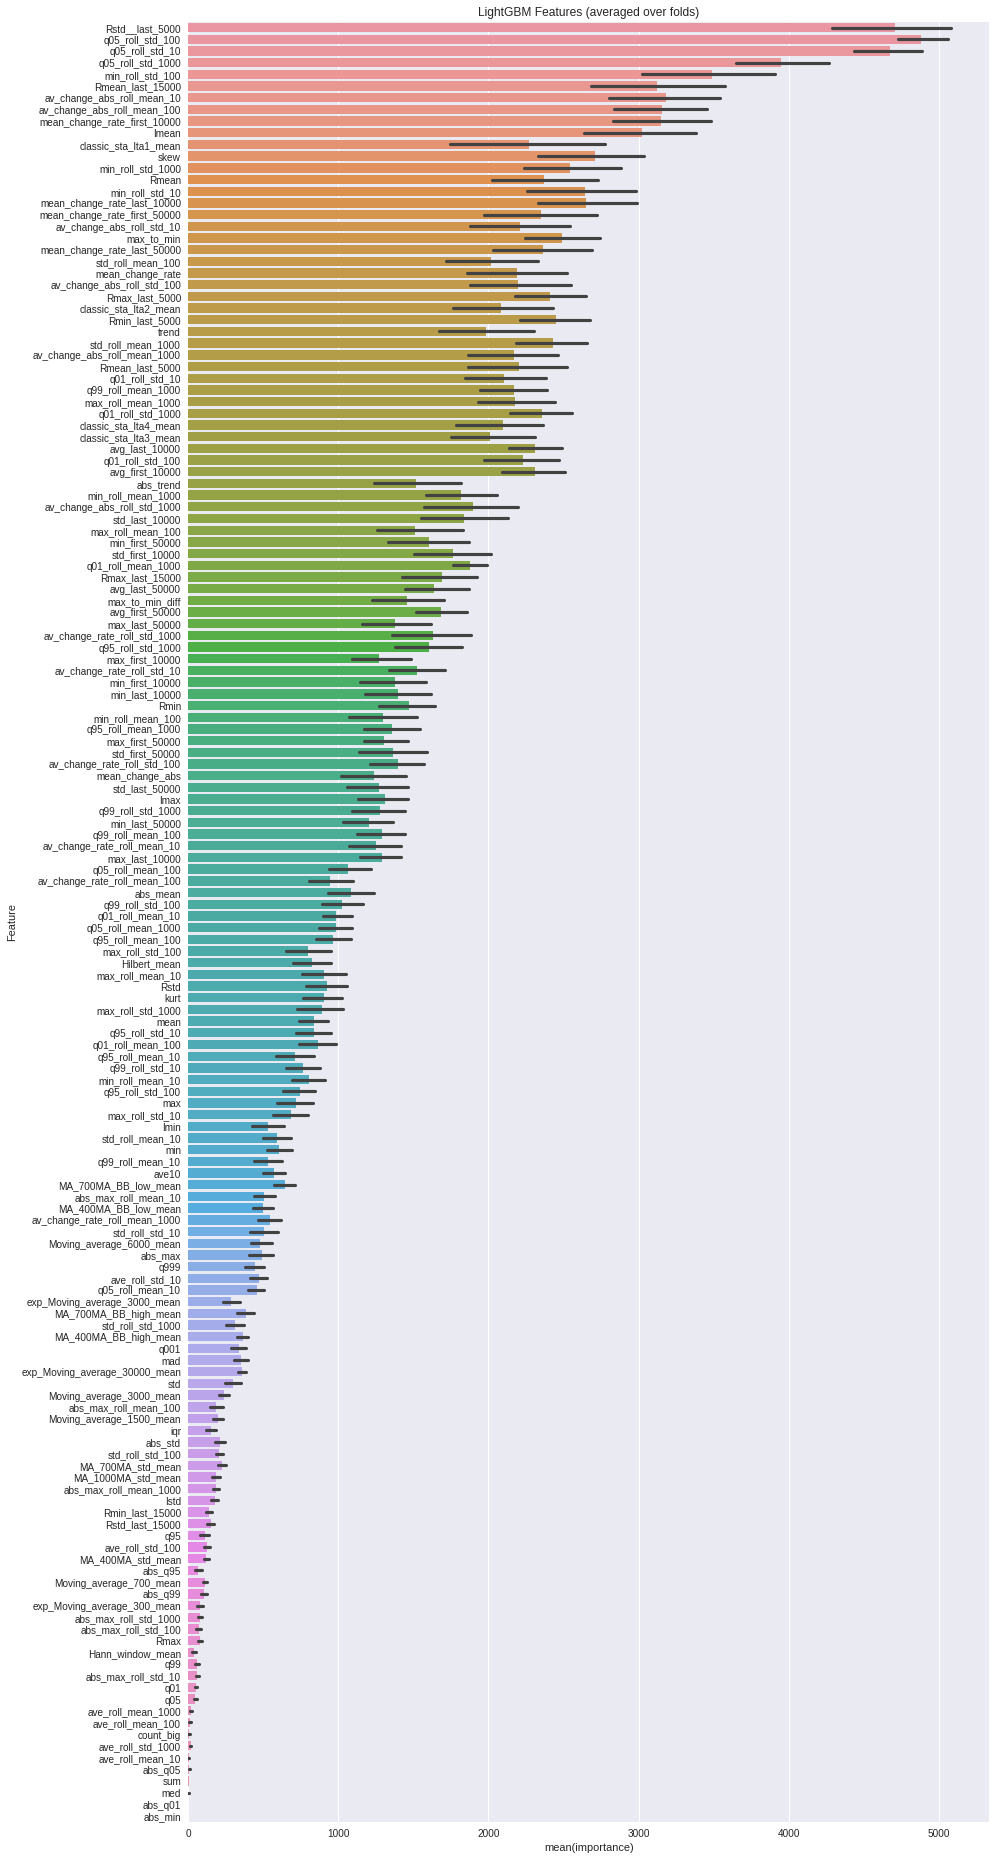

In [23]:
###### ============================ Features importance ######################
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:200].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,26))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('LightGBM Features (averaged over folds)')
plt.tight_layout()
plt.savefig('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/lgbm_importances.png')


In [0]:
###=========== Import submission file
sample_submission = pd.read_csv('sample_submission.csv', index_col='seg_id')


In [0]:
###========== Save submission file
import pickle
f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/sample_submission.pckl', 'wb')
pickle.dump(sample_submission, f)
f.close()


In [0]:
## Load submission file
import pickle
f = open('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/sample_submission.pckl', 'rb')
sample_submission = pickle.load(f)
f.close()


In [0]:

sample_submission.time_to_failure = pred
sample_submission.to_csv('/content/drive/My Drive/Kaggle Competition: LANL Earthquake Prediction/submission_3.csv',index=True)



In [0]:
sample_submission.time_to_failure = pred
sample_submission.to_csv('submission_3.csv',index=True)



In [42]:
!ls

drive	     sample_submission.csv  submission_2.csv  test.zip
sample_data  submission_1.csv	    submission_3.csv  train.csv.zip


In [44]:
# !kaggle competitions submit -c LANL-Earthquake-Prediction -f submission_1.csv -m "V-01"
!kaggle competitions submit -c LANL-Earthquake-Prediction -f submission_3.csv -m "V-03"

100% 74.6k/74.6k [00:01<00:00, 47.2kB/s]
Successfully submitted to LANL Earthquake Prediction